In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Social Network.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[    19  20000]
 [    37  45000]
 [    24  55000]
 [    29  76000]
 [    21  60000]
 [    26  85000]
 [    26 110000]
 [    30  35000]
 [    25  63000]
 [    35  78000]
 [    26  55000]
 [    27  43000]
 [    20  22000]]


In [4]:
print(y)

[0 1 1 0 0 0 0 1 1 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[   24 55000]
 [   25 63000]
 [   37 45000]
 [   30 35000]
 [   35 78000]
 [   29 76000]
 [   19 20000]
 [   26 85000]
 [   20 22000]]


In [7]:
print(x_test)

[[    26 110000]
 [    27  43000]
 [    21  60000]
 [    26  55000]]


In [8]:
print(y_train)

[1 1 1 1 0 0 0 0 0]


In [9]:
print(y_test)

[0 0 0 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[-0.55482708  0.07763332]
 [-0.38263937  0.42698328]
 [ 1.68361321 -0.35905412]
 [ 0.47829921 -0.79574156]
 [ 1.33923778  1.08201444]
 [ 0.30611149  0.99467695]
 [-1.41576565 -1.45077273]
 [-0.21045165  1.38769565]
 [-1.24357794 -1.36343524]]


In [12]:
print(x_test)

[[-0.21045165  2.47941426]
 [-0.03826394 -0.44639161]
 [-1.07139022  0.29597704]
 [-0.21045165  0.07763332]]


In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 2]
 [0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


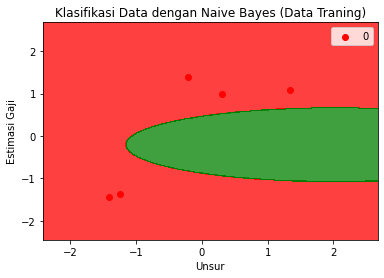

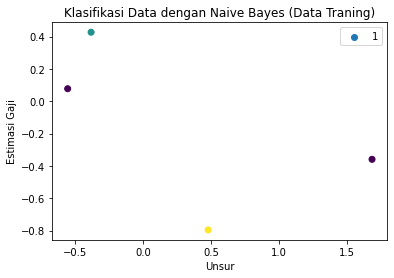

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Klasifikasi Data dengan Naive Bayes (Data Traning)')
  plt.xlabel('Unsur')
  plt.ylabel('Estimasi Gaji')
  plt.legend()
  plt.show()